<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest_symptom_isolation_viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

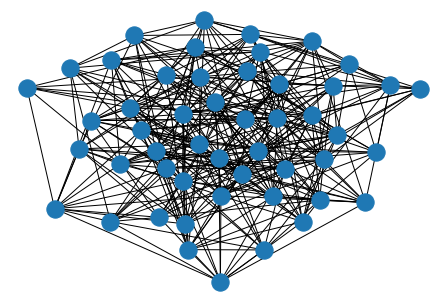

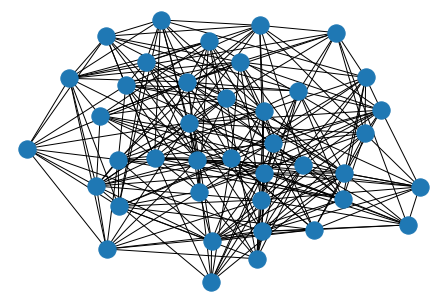

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
NUM_TESTS  = K/10 #Number of test available
PAS = 0.3 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic(i.e. Symptomatic)


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [],

In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
    Node[i*NN+j].append({'ISOLATED_S' : 0})
    Node[i*NN+j].append({'ISOLATED_I' : 0})   
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOL

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]
  Isolate = 0

  Agent[k].append({'Symptom' : Symptom, 'Isolate' : Isolate})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,0,0]})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : [Rand_state,Symptom,Isolate], 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 2}, {'I': 1}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {126: [0, 0, 0]}, {842: [0, 0, 0]}, {2847: [1, 1, 0], 'C': 0}], 1: [{'Viral_load': 0}, {'S': 2}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {1515: [0, 0, 0]}, {9234: [0, 0, 0]}], 2: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {7041: [0, 0, 0]}, {7190: [0, 0, 0]}, {7206: [0, 0, 0]}, {8189: [0, 0, 0]}, {8785: [0, 0, 0]}], 3: [{'Viral_load': 0}, {'S': 5}, {'I': 1}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {1650: [1, 1, 0], 'C': 0}, {4185: [0, 0, 0]}, {5159: [0, 0, 0]}, {5718: [0, 0, 0]}, {6753: [0, 0, 0]}, {8379: [0, 0, 0]}], 4: [{'Viral_load': 0}, {'S': 2}, {'I': 1}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {3094: [0, 0, 0]}, {5591: [1, 0, 0], 'C': 0}, {8773: [0, 0, 0]}], 5: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {'ISOLATED_S': 0}, {'ISOLATED_I': 0}, {3863: [0, 0, 0]}, {4717: [0, 0, 0]}, {9660: [0, 0, 0]}], 6: [{'V

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1, num_tests=K):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'ISOLATED_I' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(6,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id][0] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id][0] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id][0] == 2:
            Node_next[nex][3]['R']+=1

          if Node[cur][agent][a_id][2] == 1:
            if Node[cur][agent][a_id][0] == 1:
              Node_next[nex][5]['ISOLATED_I']+=1

          
          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] - Node_next[i*len(GraphN.nodes)+j][5]['ISOLATED_I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] - Node_next[i*len(GraphN.nodes)+j][4]['ISOLATED_S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(6,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] = random.choices([0,1],weights=(PAS,PS), k=1)[0]
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 0
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] != 1:
              if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:  #Time-steps of 4 to get cured(I -> R)
                Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
                count_IR+=1
                Agent_next[a_id][1]['State'] = 2
                Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
            elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 1:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C')

        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 

    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        agents=list(range(6,len(Node_next[i*len(GraphN.nodes)+j])))
        for agent in agents:
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if num_tests > 0:
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 1:
              num_tests=num_tests - 1  
              if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                num_tests=num_tests + 1 
                for agent in agents:
                  a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
                  num_tests=num_tests - 1
                  if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
                    if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
                      Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1
                break 
            

            #elif Node_next[i*len(GraphN.nodes)+j][agent][a_id][1] == 0:
            #  p = random.choices([0,1],weights=(PAS,PS), k=1)[0]
            #  if p == 0:
            #    num_tests=num_tests - 1
            #    if Node_next[i*len(GraphN.nodes)+j][agent][a_id][0] == 1:
            #      if Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] == 0:
            #        Node_next[i*len(GraphN.nodes)+j][agent][a_id][2] = 1




    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next,num_tests

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  count_ISOLATED_S=0
  count_ISOLATED_I=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    count_ISOLATED_S+=Node[i][4]['ISOLATED_S']
    count_ISOLATED_I+=Node[i][5]['ISOLATED_I']
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,count_ISOLATED_S,count_ISOLATED_I,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9782, 9516, 9344, 9187, 9035, 8839, 8549, 8093, 7450, 6644, 5906, 5132, 4280, 3392, 2547, 1836, 1242, 841, 634, 495, 398, 347, 302, 269, 247, 232, 225, 216, 213, 213, 212, 211, 211, 211, 210, 210, 209, 208, 208, 208, 208, 208]
[218, 484, 258, 266, 304, 486, 730, 1094, 1585, 2195, 1773, 2298, 2814, 3252, 3359, 3296, 3038, 2551, 1380, 1005, 712, 494, 332, 226, 151, 115, 50, 35, 26, 19, 13, 5, 2, 2, 1, 1, 2, 3, 2, 2, 1, 0]
[0, 0, 398, 547, 661, 675, 721, 813, 965, 1161, 2321, 2570, 2906, 3356, 4094, 4868, 5720, 6608, 7986, 8500, 8890, 9159, 9366, 9505, 9602, 9653, 9725, 9749, 9761, 9768, 9775, 9784, 9787, 9787, 9789, 9789, 9789, 9789, 9790, 9790, 9791, 9792]
[0.0, 28.0, 134.0, 144.0, 134.0, 159.0, 234.5, 334.25, 501.125, 701.5625, 968.78125, 1025.390625, 1151.6953125, 1338.84765625, 1567.423828125, 1712.7119140625, 1727.35595703125, 1644.677978515625, 1490.3389892578125, 1143.1694946289062, 849.5847473144531, 608.7923736572266, 429.3961868286133, 299.69809341430664, 216.84904670715332, 1

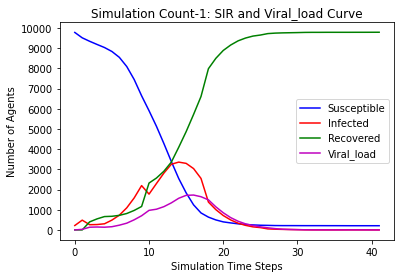

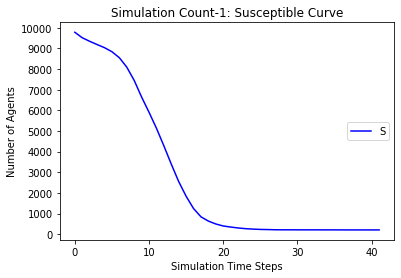

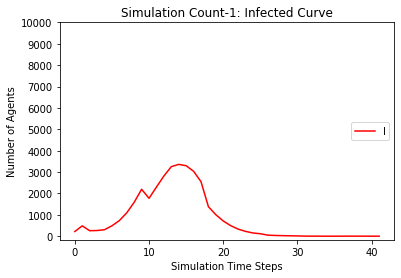

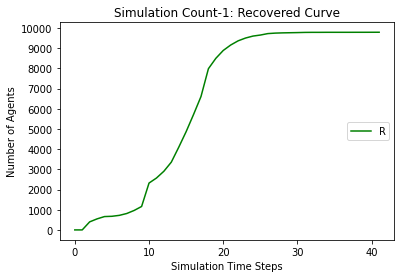

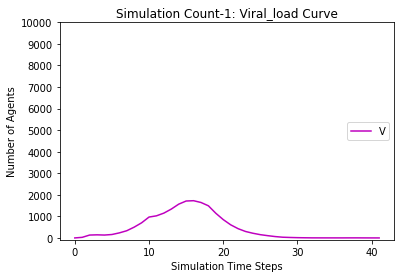

[9782, 9556, 9365, 9204, 9072, 8904, 8661, 8288, 7790, 7157, 6567, 5911, 5140, 4287, 3378, 2600, 1878, 1322, 961, 718, 544, 413, 320, 271, 248, 232, 220, 215, 208, 205, 203, 199, 197, 197, 197, 197, 197, 197]
[218, 444, 291, 271, 263, 417, 627, 916, 1282, 1747, 1279, 1762, 2287, 2870, 3189, 3311, 3262, 2965, 1911, 1561, 1202, 909, 641, 447, 296, 181, 70, 40, 34, 27, 17, 16, 11, 8, 1, 0, 0, 0]
[0, 0, 344, 525, 665, 679, 712, 796, 928, 1096, 2154, 2327, 2573, 2843, 3433, 4089, 4860, 5713, 7128, 7721, 8254, 8678, 9039, 9282, 9456, 9587, 9710, 9745, 9758, 9768, 9780, 9785, 9792, 9795, 9802, 9803, 9803, 9803]
[0.0, 22.0, 122.0, 145.0, 148.5, 130.25, 185.125, 260.5625, 355.28125, 539.640625, 789.8203125, 757.91015625, 880.955078125, 1063.4775390625, 1329.73876953125, 1554.869384765625, 1643.4346923828125, 1678.7173461914062, 1622.3586730957031, 1327.1793365478516, 1092.5896682739258, 875.2948341369629, 658.6474170684814, 498.3237085342407, 358.16185426712036, 250.08092713356018, 175.04046356

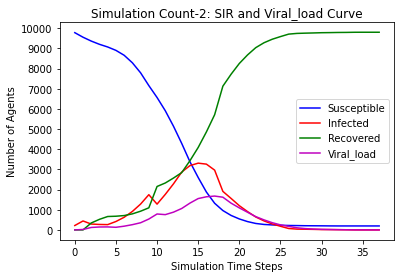

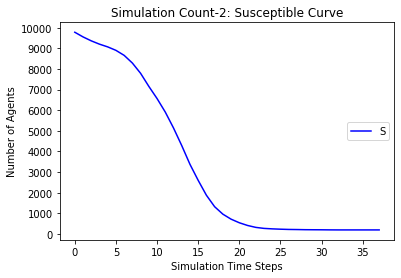

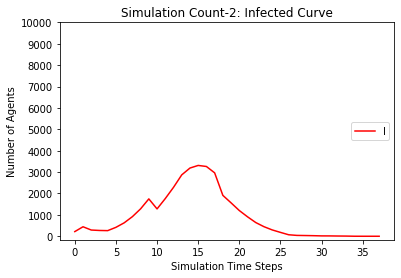

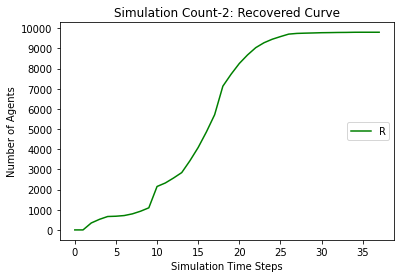

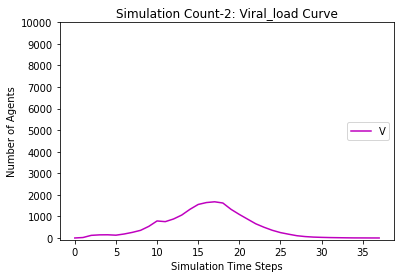

[9782, 9532, 9341, 9204, 9035, 8814, 8502, 8065, 7433, 6604, 5842, 5092, 4227, 3323, 2483, 1788, 1244, 840, 605, 481, 367, 307, 253, 219, 195, 185, 179, 175, 173, 171, 170, 170, 169, 169, 168, 168, 168, 168, 168, 168]
[218, 468, 276, 221, 328, 542, 809, 1139, 1602, 2210, 1819, 2320, 2831, 3281, 3359, 3304, 2983, 2483, 1411, 1012, 738, 533, 352, 262, 172, 122, 37, 25, 15, 14, 9, 5, 4, 2, 2, 2, 1, 1, 0, 0]
[0, 0, 383, 575, 637, 644, 689, 796, 965, 1186, 2339, 2588, 2942, 3396, 4158, 4908, 5773, 6677, 7984, 8507, 8895, 9160, 9395, 9519, 9633, 9693, 9784, 9800, 9812, 9815, 9821, 9825, 9827, 9829, 9830, 9830, 9831, 9831, 9832, 9832]
[0.0, 38.0, 133.0, 137.5, 140.75, 178.375, 244.1875, 344.09375, 530.046875, 746.0234375, 1013.01171875, 1042.505859375, 1178.2529296875, 1373.12646484375, 1532.563232421875, 1651.2816162109375, 1689.6408081054688, 1620.8204040527344, 1476.4102020263672, 1098.2051010131836, 819.1025505065918, 614.5512752532959, 446.27563762664795, 312.137818813324, 210.0689094066

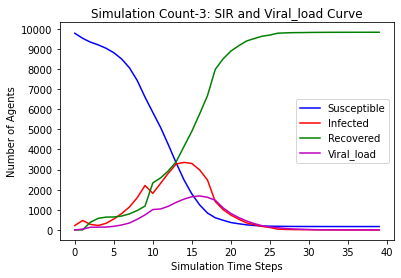

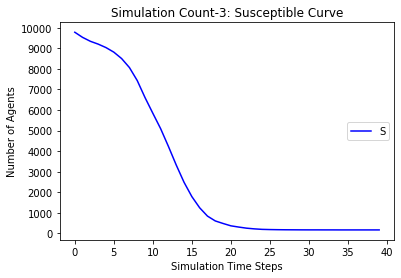

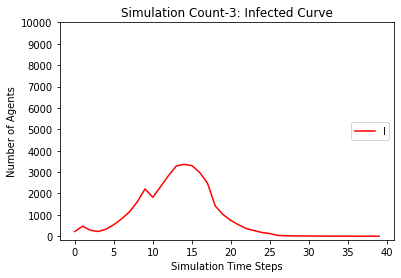

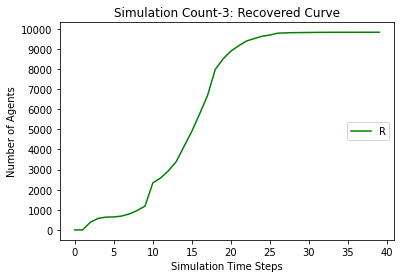

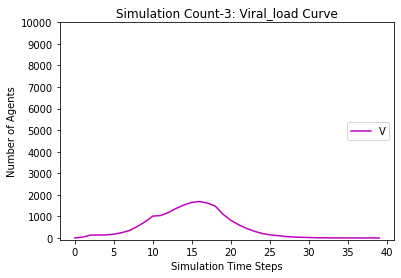

[9782, 9522, 9305, 9134, 8933, 8673, 8307, 7801, 7066, 6132, 5301, 4441, 3480, 2592, 1814, 1231, 832, 563, 404, 329, 281, 251, 223, 206, 189, 179, 161, 154, 149, 147, 145, 144, 144, 144, 144, 144, 144]
[218, 478, 325, 271, 397, 644, 964, 1333, 1867, 2541, 2159, 2692, 3201, 3540, 3487, 3210, 2648, 2029, 1040, 705, 478, 312, 181, 123, 92, 72, 37, 35, 34, 32, 16, 10, 5, 3, 0, 0, 0]
[0, 0, 370, 595, 670, 683, 729, 866, 1067, 1327, 2540, 2867, 3319, 3868, 4699, 5559, 6520, 7408, 8556, 8966, 9241, 9437, 9596, 9671, 9719, 9749, 9802, 9811, 9817, 9821, 9839, 9846, 9851, 9853, 9856, 9856, 9856]
[0.0, 29.0, 148.5, 154.25, 154.125, 187.0625, 275.53125, 414.765625, 607.3828125, 850.69140625, 1158.345703125, 1225.1728515625, 1388.58642578125, 1609.293212890625, 1803.6466064453125, 1818.8233032226562, 1758.4116516113281, 1643.205825805664, 1383.602912902832, 997.801456451416, 705.900728225708, 480.950364112854, 335.475182056427, 224.7375910282135, 151.36879551410675, 98.68439775705338, 72.3421988785

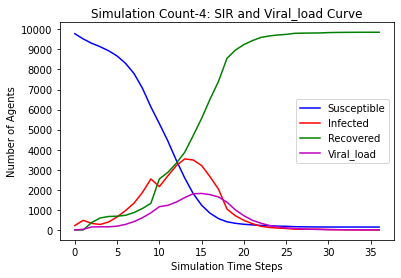

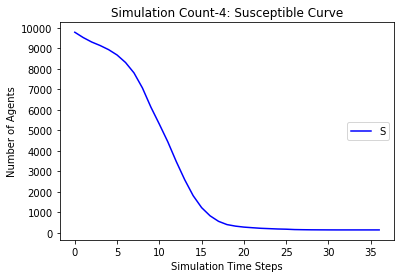

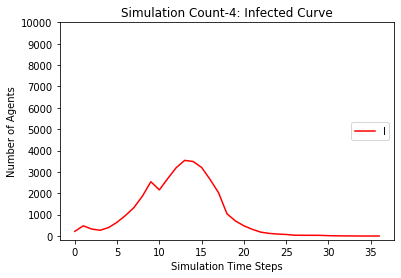

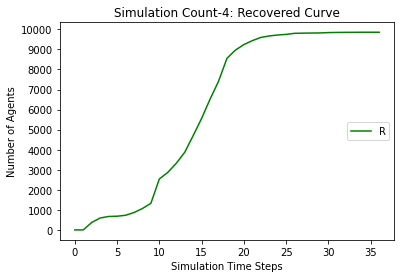

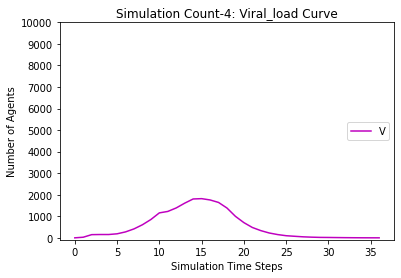

[9782, 9552, 9341, 9165, 8981, 8749, 8391, 7900, 7220, 6362, 5620, 4792, 3946, 3072, 2245, 1577, 1049, 692, 502, 381, 296, 243, 203, 179, 169, 158, 154, 152, 148, 147, 146, 145, 145, 144, 144, 144, 144, 143, 143, 143, 143, 143, 142, 142, 142, 142, 141, 141, 141, 141, 141]
[218, 448, 319, 277, 370, 589, 895, 1265, 1761, 2387, 1884, 2433, 2894, 3290, 3375, 3215, 2897, 2380, 1325, 959, 647, 449, 299, 202, 127, 85, 34, 19, 16, 11, 8, 7, 3, 3, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 340, 558, 649, 662, 714, 835, 1019, 1251, 2496, 2775, 3160, 3638, 4380, 5208, 6054, 6928, 8173, 8660, 9057, 9308, 9498, 9619, 9704, 9757, 9812, 9829, 9836, 9842, 9846, 9848, 9852, 9853, 9854, 9855, 9855, 9856, 9856, 9856, 9856, 9857, 9857, 9857, 9857, 9857, 9858, 9858, 9858, 9858, 9859]
[0.0, 27.0, 139.5, 155.75, 169.875, 192.9375, 267.46875, 393.734375, 548.8671875, 790.43359375, 1060.216796875, 1060.1083984375, 1200.05419921875, 1369.027099609375, 1593.5135498046875, 1714.7567749023438, 1692.

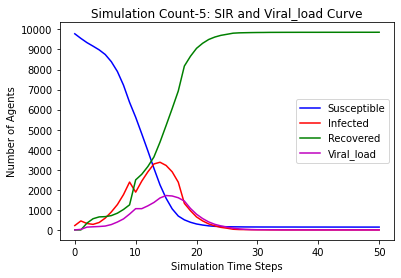

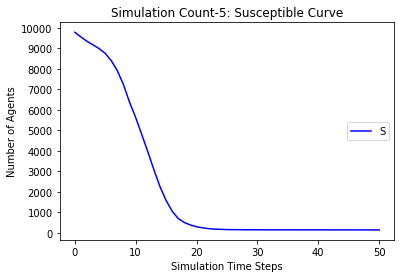

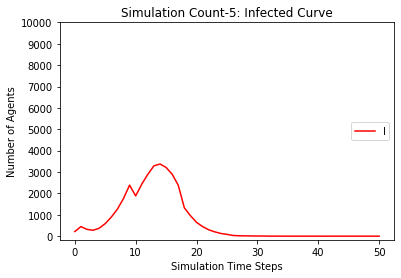

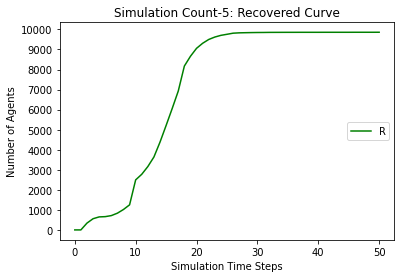

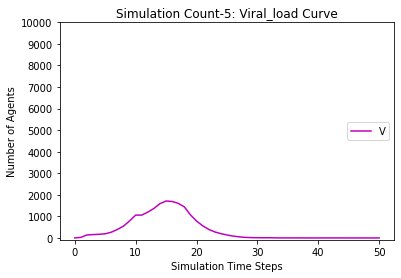

[9782, 9513, 9340, 9154, 8982, 8726, 8350, 7818, 7168, 6290, 5510, 4676, 3797, 2966, 2156, 1476, 973, 652, 458, 357, 302, 261, 233, 216, 203, 192, 181, 176, 171, 167, 167, 166, 166, 166, 166, 166, 166]
[218, 487, 254, 305, 357, 600, 925, 1336, 1814, 2436, 1983, 2510, 3007, 3324, 3354, 3200, 2824, 2314, 1223, 832, 557, 391, 225, 141, 99, 69, 29, 27, 28, 25, 14, 10, 5, 1, 1, 0, 0]
[0, 0, 406, 541, 661, 674, 725, 846, 1018, 1274, 2507, 2814, 3196, 3710, 4490, 5324, 6203, 7034, 8319, 8811, 9141, 9348, 9542, 9643, 9698, 9739, 9790, 9797, 9801, 9808, 9819, 9824, 9829, 9833, 9833, 9834, 9834]
[0.0, 35.0, 144.5, 147.25, 165.625, 190.8125, 272.40625, 405.203125, 590.6015625, 791.30078125, 1031.650390625, 1063.8251953125, 1258.91259765625, 1446.456298828125, 1645.2281494140625, 1764.6140747070312, 1754.3070373535156, 1650.1535186767578, 1431.076759338379, 1032.5383796691895, 764.2691898345947, 527.1345949172974, 355.5672974586487, 222.78364872932434, 140.39182436466217, 92.19591218233109, 68.097

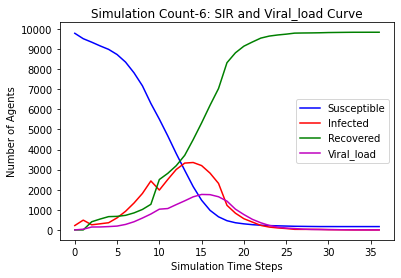

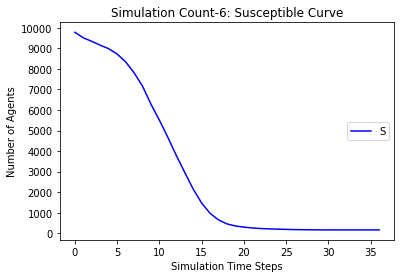

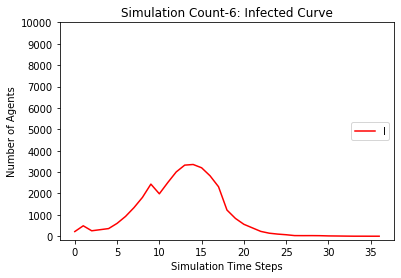

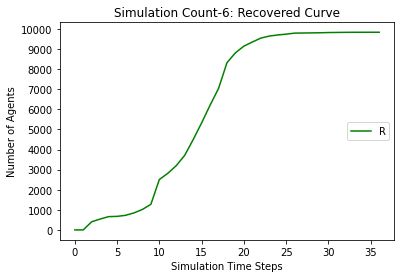

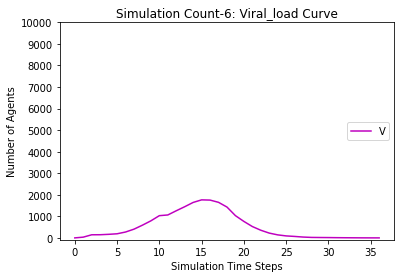

[9782, 9558, 9365, 9176, 8947, 8656, 8244, 7624, 6799, 5822, 4911, 4033, 3155, 2327, 1596, 1082, 697, 470, 365, 309, 270, 241, 220, 202, 192, 187, 184, 183, 183, 182, 182, 181, 180, 178, 177, 177, 177, 176, 176, 176, 175, 174, 174, 174]
[218, 442, 280, 295, 422, 699, 1067, 1552, 2148, 2834, 2420, 2905, 3256, 3495, 3315, 2951, 2458, 1857, 858, 557, 346, 229, 145, 107, 78, 54, 20, 10, 5, 5, 2, 2, 3, 4, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0]
[0, 0, 355, 529, 631, 645, 689, 824, 1053, 1344, 2669, 3062, 3589, 4178, 5089, 5967, 6845, 7673, 8777, 9134, 9384, 9530, 9635, 9691, 9730, 9759, 9796, 9807, 9812, 9813, 9816, 9817, 9817, 9818, 9821, 9822, 9822, 9822, 9823, 9823, 9823, 9824, 9826, 9826]
[0.0, 33.0, 138.5, 151.25, 180.625, 234.3125, 329.15625, 465.578125, 674.7890625, 942.39453125, 1277.197265625, 1320.5986328125, 1451.29931640625, 1611.649658203125, 1800.8248291015625, 1864.4124145507812, 1733.2062072753906, 1494.6031036376953, 1243.3015518188477, 863.6507759094238, 580.8253879547119, 370.41269

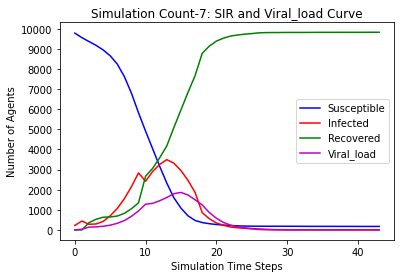

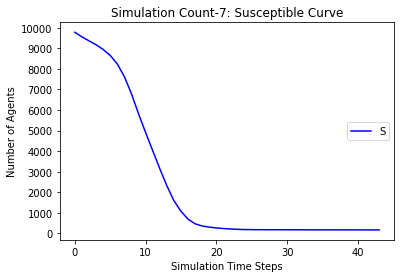

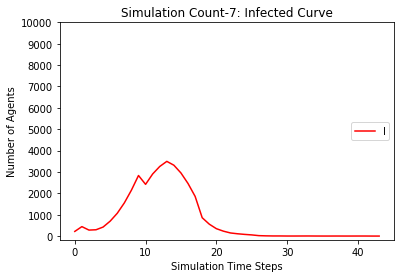

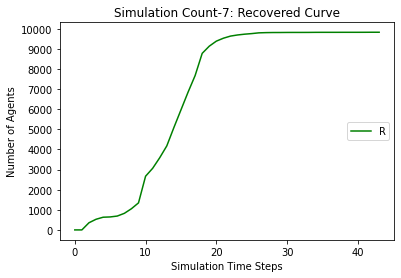

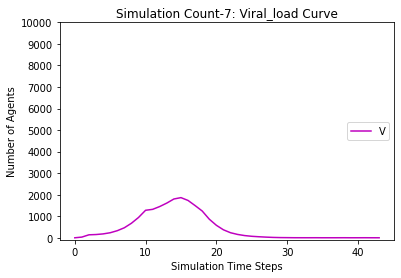

[9782, 9534, 9347, 9211, 9052, 8857, 8564, 8127, 7531, 6800, 6171, 5473, 4674, 3781, 2913, 2141, 1509, 1023, 729, 539, 401, 304, 243, 211, 191, 177, 167, 156, 151, 148, 146, 144, 142, 142, 142, 142, 142, 142, 142]
[218, 466, 269, 235, 317, 495, 744, 1084, 1521, 2057, 1500, 1980, 2474, 3019, 3258, 3332, 3165, 2758, 1714, 1299, 967, 719, 486, 328, 210, 127, 66, 47, 36, 29, 21, 12, 9, 6, 3, 2, 0, 0, 0]
[0, 0, 384, 554, 631, 648, 692, 789, 948, 1143, 2329, 2547, 2852, 3200, 3829, 4527, 5326, 6219, 7557, 8162, 8632, 8977, 9271, 9461, 9599, 9696, 9767, 9797, 9813, 9823, 9833, 9844, 9849, 9852, 9855, 9856, 9858, 9858, 9858]
[0.0, 26.0, 124.0, 136.0, 120.0, 154.0, 225.0, 323.5, 466.75, 667.375, 946.6875, 938.34375, 1028.171875, 1211.0859375, 1492.54296875, 1648.271484375, 1696.1357421875, 1688.06787109375, 1567.033935546875, 1233.5169677734375, 984.7584838867188, 782.3792419433594, 574.1896209716797, 429.09481048583984, 309.5474052429199, 213.77370262145996, 140.88685131072998, 79.443425655364

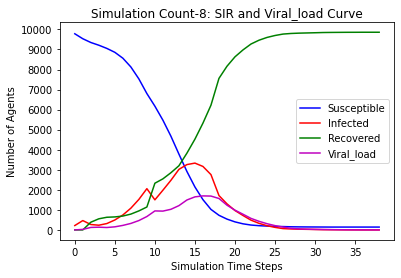

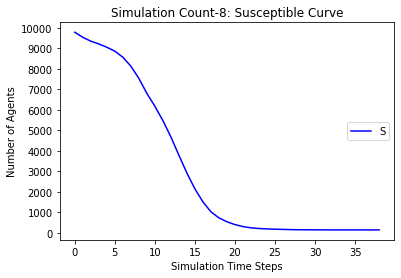

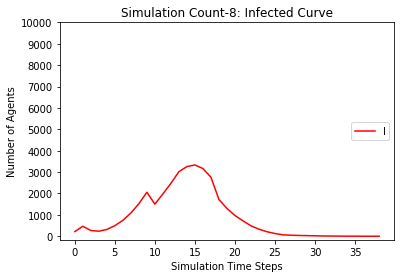

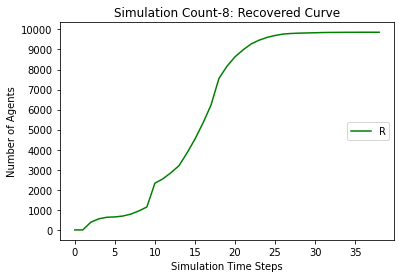

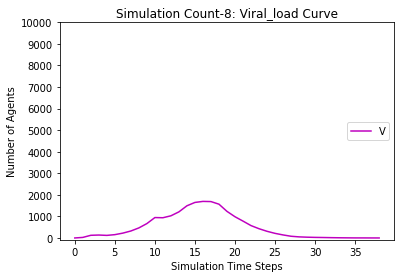

[9782, 9507, 9323, 9153, 8966, 8700, 8306, 7773, 7050, 6103, 5267, 4433, 3489, 2657, 1908, 1343, 879, 576, 431, 348, 290, 250, 238, 225, 218, 209, 204, 202, 202, 201, 199, 199, 199, 199, 199, 199, 199]
[218, 493, 278, 292, 373, 618, 959, 1380, 1916, 2597, 2179, 2679, 3165, 3446, 3359, 3090, 2610, 2081, 993, 710, 463, 326, 193, 123, 72, 41, 23, 16, 11, 8, 5, 3, 3, 2, 0, 0, 0]
[0, 0, 399, 555, 661, 682, 735, 847, 1034, 1300, 2554, 2888, 3346, 3897, 4733, 5567, 6511, 7343, 8576, 8942, 9247, 9424, 9569, 9652, 9710, 9750, 9773, 9782, 9787, 9791, 9796, 9798, 9798, 9799, 9801, 9801, 9801]
[0.0, 34.0, 155.0, 161.5, 172.75, 197.375, 295.6875, 413.84375, 574.921875, 827.4609375, 1153.73046875, 1238.865234375, 1367.4326171875, 1522.71630859375, 1693.358154296875, 1765.6790771484375, 1736.8395385742188, 1594.4197692871094, 1359.2098846435547, 943.6049423217773, 640.8024711608887, 423.40123558044434, 291.70061779022217, 199.85030889511108, 129.92515444755554, 82.96257722377777, 55.481288611888885, 

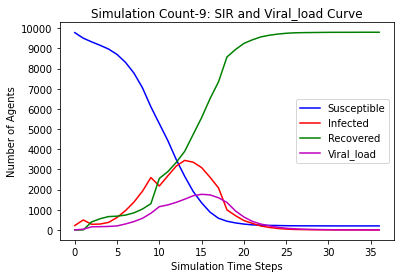

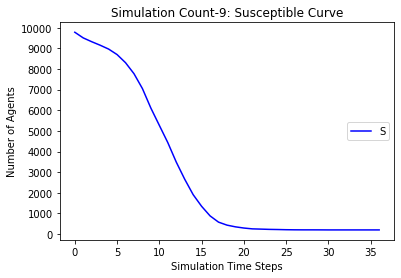

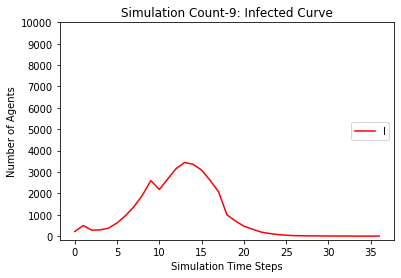

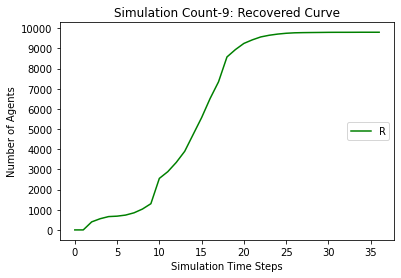

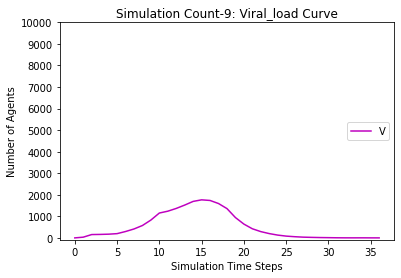

[9782, 9531, 9341, 9181, 9023, 8817, 8507, 8041, 7462, 6689, 5949, 5131, 4240, 3347, 2468, 1724, 1166, 770, 570, 448, 377, 321, 297, 271, 251, 244, 241, 238, 237, 236, 236, 235, 235, 234, 232, 228, 227, 226, 224, 223, 223, 219, 219, 219, 219, 218, 218, 217, 216, 214, 214, 214, 214]
[218, 469, 279, 264, 323, 514, 778, 1140, 1561, 2128, 1750, 2305, 2864, 3342, 3481, 3407, 3074, 2577, 1461, 1025, 683, 449, 273, 177, 126, 77, 22, 14, 9, 8, 5, 3, 2, 2, 4, 7, 8, 8, 8, 5, 4, 7, 1, 1, 1, 1, 1, 2, 3, 4, 0, 0, 0]
[0, 0, 380, 555, 654, 669, 715, 819, 977, 1183, 2301, 2564, 2896, 3311, 4051, 4869, 5760, 6653, 7969, 8527, 8940, 9230, 9430, 9552, 9623, 9679, 9737, 9748, 9754, 9756, 9759, 9762, 9763, 9764, 9764, 9765, 9765, 9766, 9768, 9772, 9773, 9774, 9780, 9780, 9780, 9781, 9781, 9781, 9781, 9782, 9786, 9786, 9786]
[0.0, 36.0, 140.0, 146.0, 139.0, 166.5, 229.25, 336.625, 506.3125, 715.15625, 990.578125, 1029.2890625, 1153.64453125, 1357.822265625, 1556.9111328125, 1741.45556640625, 1754.7277832031

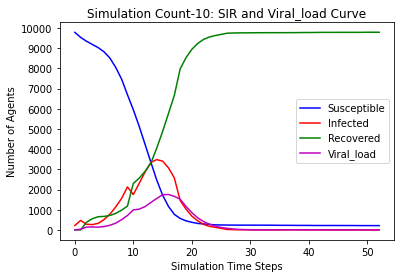

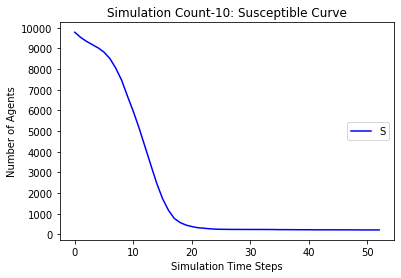

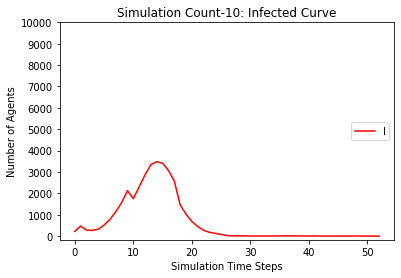

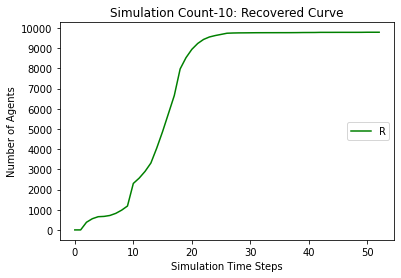

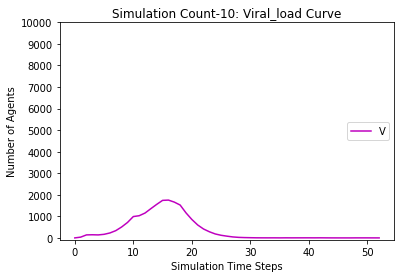

In [10]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  count_timestep=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  num_tests_p=NUM_TESTS
  num_tests_n=NUM_TESTS 
  Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n,num_tests_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1,num_tests_n)
    count_timestep=count_timestep+1
    if count_timestep == 7:
      num_tests_n = NUM_TESTS
      count_timestep=0
    #if num_tests_n < K/100:
    #  num_tests_n = NUM_TESTS
    j+=1 
    Sj,Ij,Rj,ISOLATED_Sj,ISOLATED_Ij,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  print(num_tests_n)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

Susceptible Average (100 Simulations): [9782, 9522.5625, 9335.98046875, 9171.24609375, 8987.30078125, 8738.71484375, 8372.0390625, 7855.63671875, 7159.2578125, 6272.50390625, 5487.31640625, 4683.18359375, 3792.1953125, 2942.45703125, 2157.54296875, 1534.0625, 1032.375, 688.68359375, 504.95703125, 395.23046875, 318.0625, 264.3203125, 236.046875, 216.6328125, 205.12890625, 195.1171875, 188.52734375, 184.08203125, 182.26171875, 180.546875, 178.96484375, 178.2109375, 177.5703125, 177.2890625, 177.15234375, 177.15234375, 177.1484375]
Infected Average(100 Simulations): [218, 477.4375, 276.47265625, 277.40234375, 363.35546875, 593.85546875, 911.33984375, 1315.609375, 1828.04296875, 2466.2109375, 2009.6796875, 2506.578125, 2978.43359375, 3330.046875, 3329.7734375, 3149.12109375, 2759.8203125, 2253.7734375, 1190.22265625, 860.2890625, 592.2421875, 424.36328125, 268.91015625, 178.59765625, 112.93359375, 69.203125, 34.7109375, 24.31640625, 18.2578125, 14.5703125, 9.5625, 5.87109375, 4.69140625, 3

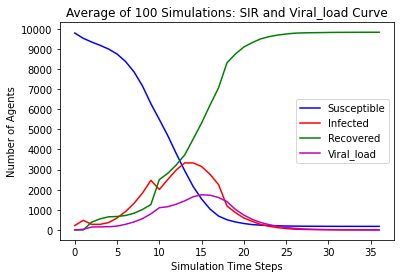

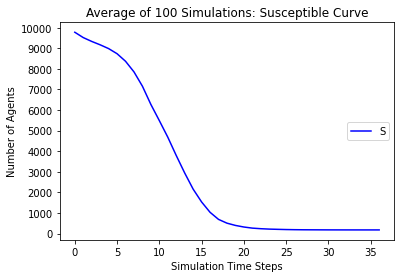

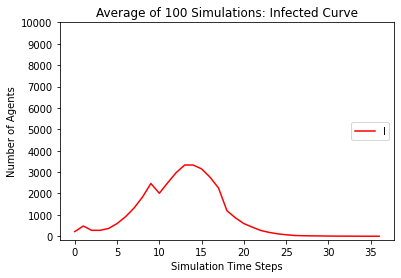

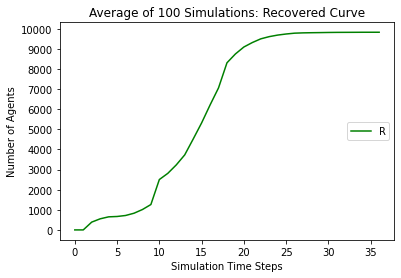

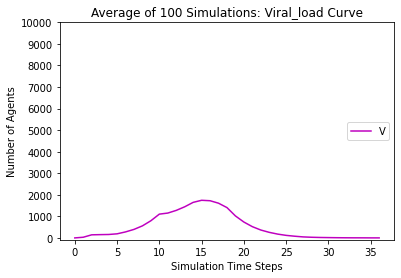

In [11]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
